# 富士山下山問題

#### 【問題1】データの可視化

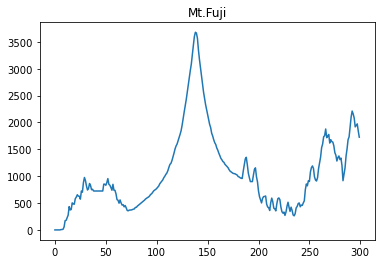

2713.03


In [1]:
#----インポート----
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#----ＣＳＶをインポート----
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1) # np.loadtxtはCSVをNumpyで利用する関数、delimiterは値と値を区切る文字が何であるかskiprows何行目から読み込み始めるか
#print(fuji)

#----グラフを表示----
plt.title('Mt.Fuji') # グラフタイトル
position = np.array(fuji[:, 0]) # CSVの0列のX地点をpositionとする
elevation = np.array(fuji[:, 3]) # CSVの3のelevationをelevationとする
plt.plot(position, elevation) #X軸にposition、Y軸にelevationを入力
plt.show() #グラフ表示

#----下山し始める任意のXを145とすると、その高さのelevationは
starting_point = elevation = np.array(fuji[145, 3])
print(starting_point)

#### 問題2】ある地点の勾配を計算する関数を作成

In [2]:
#----インポート----
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#----ＣＳＶをインポート----
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1) # np.loadtxtはCSVをNumpyで利用する関数、delimiterは値と値を区切る文字が何であるかskiprows何行目から読み込み始めるか

#----関数を定義----
def slope_Mt_Fuji(i):
    """
    ある地点の勾配を計算する関数
    
    入力：ある地点（i）
    amount_X：Xの変化量
    amount_Y：Yの変化量
    slope_fuji：勾配（amount_Y　/　amount_X　で求める
    出力：i地点の勾配（slope_fuji）
    """
    
    amount_X = fuji[i, 0] - fuji[i-1, 0] #Xのi地点から（i-1）地点の差分（変化量）
    amount_Y = fuji[i, 3] - fuji[i-1, 3] #Yのi地点から（i-1）地点の差分（変化量）
    slope_fuji = amount_Y / amount_X #勾配
    return slope_fuji

#----関数を呼び出し----
slope_fuji = slope_Mt_Fuji(145) #小林さんにここにプリントを書く方法も教わったが関数を呼び出す書き方としてOKか
print("引数の地点の勾配は {0}です。".format(slope_fuji))


引数の地点の勾配は -151.52999999999975です。


#### 【問題3】移動先の地点を計算する関数を作成

In [ ]:
#----インポート----
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

#----ＣＳＶをインポート----
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1) # np.loadtxtはCSVをNumpyで利用する関数、delimiterは値と値を区切る文字が何であるかskiprows何行目から読み込み始めるか

#----関数作成----
def destination_point_function(i ,α=0.2):
    """
    今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数
    
    移動先の地点を算出する式：「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」
    α：ハイパーパラメータ（今回は0.2をデフォルト）
    入力：ある地点（i）
    destination_point：移動先の地点
    出力：i地点の勾配（slope_fuji）
    """
    def slope_Mt_Fuji(i):

        """
        ある地点の勾配を計算する関数

        入力：ある地点（i）
        amount_X：Xの変化量
        amount_Y：Yの変化量
        slope_fuji：勾配（amount_Y　/　amount_X　で求める
        出力：i地点の勾配（slope_fuji）
        """

        amount_X = fuji[i, 0] - fuji[i-1, 0] #Xのi地点から（i-1）地点の差分（変化量）
        amount_Y = fuji[i, 3] - fuji[i-1, 3] #Yのi地点から（i-1）地点の差分（変化量）
        slope_fuji = amount_Y / amount_X #勾配
        return slope_fuji

    slope_fuji = slope_Mt_Fuji(i) #slope_Mt_Fujiを引数(i)で呼び出し
    
    
    destination_point = fuji[i, 0] - α * slope_fuji #移動先の地点(destination_point) = 今いる地点(fuji[i, 0]) - α ×今いる地点の勾配(slope_fuji)
    return destination_point ,i #現在の地点移動先の地点(destination_point) をリターン

destination_point ,i= destination_point_function(i=145 ,α=0.2) #slope_Mt_Fujiを引数(i)で呼び出し
destination_point_decimalcut = Decimal(destination_point).quantize(Decimal('0'), rounding=ROUND_HALF_UP) #四捨五入するDecimalでXの誤差をカット
print("今いる地点X={0}、高さY={1}の勾配の情報を元に算出した、次に移動先の地点はX={2}、高さY={3}です。".format(i, fuji[i, 3], destination_point_decimalcut, fuji[int(destination_point_decimalcut), 3]))



#### 【問題4】山を下る関数を作成

In [3]:
#----インポート----
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

#----ＣＳＶをインポート----
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1) # np.loadtxtはCSVをNumpyで利用する関数、delimiterは値と値を区切る文字が何であるかskiprows何行目から読み込み始めるか
destination_point_list = []

#----関数③作成----
def down_MtFuji_function(k):
            
    """
    最初の地点を受け取り、while文で繰り返し勾配による下山を繰り返しXの移動量が5以下となったところで下山したと判断する
    引数：最初の地点（k）
    入力：次に移動する地点（destination_point）
    入力が入る度にリストにdestination_pointを格納する
    destination_point_list = [k]　#下山していくX地点の履歴リスト
    destination_point_list.append(destination_point)　destination_point_functionで次の下山地点がreturnする度にリストに入れる
        
    出力：whileが終了した時のリストの最終値
    """
    #下山していくX地点の履歴リスト
    destination_point_list = [k]
    
    #Xの移動量が5以下になったらwhile終了
    
    while len(destination_point_list) < len(fuji[:, 0]): #下山したポイントがX地点の数より少ない限り繰り返す
        
        #始めのＸ位置を今の移動地点をリストの最終要素（初回はｋの値）にする
        i = destination_point_list[-1]
        
        #↓その時iに何が入っているか確認できる
        #print("i は"+str(i))↓
        
                #if分でリストの中身が３個以上、かつ下山したX地点同士の差が2以下の場合下山完了完了としてbreak
        if len(destination_point_list) > 3 and abs(destination_point_list[-1] - destination_point_list[-2] ) < 2:
            break
        
        #----関数②作成----
        def destination_point_function(i ,α=0.2):
            """
            今いる地点の勾配の情報を元に、次に移動する地点を計算する関数

            移動先の地点を算出する式：「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」
            α：ハイパーパラメータ（今回は0.2をデフォルト）
            入力：ある地点（i）
            destination_point：移動先の地点
            出力：次に移動する地点
            """
                        
            #----関数①作成----
            def slope_Mt_Fuji(i):

                """
                ある地点の勾配を計算する関数

                入力：ある地点（i）
                amount_X：Xの変化量
                amount_Y：Yの変化量
                slope_fuji：勾配（amount_Y　/　amount_X　で求める
                出力：i地点の勾配（slope_fuji）
                """

                amount_X = fuji[int(i), 0] - fuji[int(i)-1, 0] #Xのi地点から（i-1）地点の差分（変化量）
                amount_Y = fuji[int(i), 3] - fuji[int(i)-1, 3] #Yのi地点から（i-1）地点の差分（変化量）
                slope_fuji = amount_Y / amount_X #勾配
                
                return slope_fuji
                #----関数①ここまで----
                
            slope_fuji = slope_Mt_Fuji(i) #直上の関数①（slope_Mt_Fujiを引数(i)で呼び出し）
            
            #移動先の地点(destination_point) = 今いる地点(fuji[i, 0]) - α ×今いる地点の勾配(slope_fuji)
            destination_point = fuji[int(i), 0] - α * slope_fuji
            
            #四捨五入するDecimalでXの誤差をカット
            destination_point_decimalcut = Decimal(destination_point).quantize(Decimal('0'), rounding=ROUND_HALF_UP) 
            
            return destination_point_decimalcut ,i #次に移動する地点(destination_point) と最初の地点をリターン
            #----関数②ここまで----
            
        #直上のdestination_point_functionを呼び出し、始まりの地点は下山リストの最終値（destination_point_list[-1]）    
        destination_point_decimalcut ,i= destination_point_function(i=destination_point_list[-1] ,α=0.2) 
        
        #関数②でリターンされた下山した移動地点（destination_point）をリストに格納
        destination_point_list.append(int(destination_point_decimalcut))
    
      
    return destination_point_list
    #----関数③ここまで----

#----関数の呼び出し文----  
destination_point_list = down_MtFuji_function(k=135)        
print(destination_point_list)

[135, 99, 96, 90, 87, 84, 81, 77, 75, 75]


#### 【問題5】下山過程の可視化

下山ルートのＸ座標:[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77]


下山ルートのＹ座標:[3434, 817.62, 741.17, 672.36, 631.71, 575.07, 505.1, 458.66, 418.41, 368.91, 412.27, 390.14, 386.64]


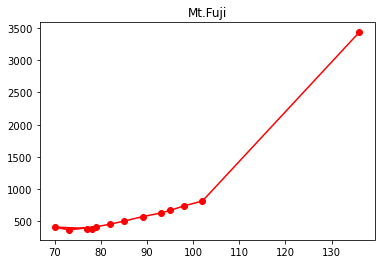

In [4]:
#----インポート----
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

#----ＣＳＶをインポート----
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1) # np.loadtxtはCSVをNumpyで利用する関数、delimiterは値と値を区切る文字が何であるかskiprows何行目から読み込み始めるか
destination_point_list = []

#----関数③作成----
def down_MtFuji_function(k):
            
    """
    最初の地点を受け取り、while文で繰り返し勾配による下山を繰り返しXの移動量が5以下となったところで下山したと判断する
    引数：最初の地点（k）
    入力：次に移動する地点（destination_point）
    入力が入る度にリストにdestination_pointを格納する
    destination_point_list = [k]　#下山していくX地点の履歴リスト
    destination_point_list.append(destination_point)　destination_point_functionで次の下山地点がreturnする度にリストに入れる
        
    出力：whileが終了した時のリストの最終値
    """
    #下山していくX地点の履歴リスト
    destination_point_list = [k]
    
    #Xの移動量が5以下になったらwhile終了
    
    while len(destination_point_list) < len(fuji[:, 0]): #下山したポイントがX地点の数より少ない限り繰り返す
        
        #始めのＸ位置を今の移動地点をリストの最終要素（初回はｋの値）にする
        i = destination_point_list[-1]
        
        #↓その時iに何が入っているか確認できる
        #print("i は"+str(i))↓
        
        #if分でリストの中身が３個以上、かつ下山したX地点同士の差が1以下の場合下山完了完了としてbreak
        if len(destination_point_list) > 3 and abs(destination_point_list[-1] - destination_point_list[-2] ) <= 1:
            break
        
        #----関数②作成----
        def destination_point_function(i ,α=0.2):
            """
            今いる地点の勾配の情報を元に、次に移動する地点を計算する関数

            移動先の地点を算出する式：「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」
            α：ハイパーパラメータ（今回は0.2をデフォルト）
            入力：ある地点（i）
            destination_point：移動先の地点
            出力：次に移動する地点
            """
                        
            #----関数①作成----
            def slope_Mt_Fuji(i):

                """
                ある地点の勾配を計算する関数

                入力：ある地点（i）
                amount_X：Xの変化量
                amount_Y：Yの変化量
                slope_fuji：勾配（amount_Y　/　amount_X　で求める
                出力：i地点の勾配（slope_fuji）
                """

                amount_X = fuji[int(i), 0] - fuji[int(i)-1, 0] #Xのi地点から（i-1）地点の差分（変化量）
                amount_Y = fuji[int(i), 3] - fuji[int(i)-1, 3] #Yのi地点から（i-1）地点の差分（変化量）
                slope_fuji = amount_Y / amount_X #勾配
                
                return slope_fuji
                #----関数①ここまで----
                
            slope_fuji = slope_Mt_Fuji(i) #直上の関数①（slope_Mt_Fujiを引数(i)で呼び出し）
            
            #移動先の地点(destination_point) = 今いる地点(fuji[i, 0]) - α ×今いる地点の勾配(slope_fuji)
            destination_point = fuji[int(i), 0] - α * slope_fuji
            
            #四捨五入するDecimalでXの誤差をカット
            destination_point_decimalcut = Decimal(destination_point).quantize(Decimal('0'), rounding=ROUND_HALF_UP) 
            
            return destination_point_decimalcut ,i #次に移動する地点(destination_point) と最初の地点をリターン
            #----関数②ここまで----
            
        #直上のdestination_point_functionを呼び出し、始まりの地点は下山リストの最終値（destination_point_list[-1]）    
        destination_point_decimalcut ,i= destination_point_function(i=destination_point_list[-1] ,α=0.2) 
        
        #関数②でリターンされた下山した移動地点（destination_point）をリストに格納
        destination_point_list.append(int(destination_point_decimalcut))
    
      
    return destination_point_list
    #----関数③ここまで----

#----関数の呼び出し文----  
K = 136
destination_point_list = down_MtFuji_function(K)

#----下山ルートのＸ座標を表示
print("下山ルートのＸ座標:"+str(destination_point_list))
print("\n")


#----下山ルートのY座標リスト（初期値にX=136を代入）
destination_point_list_elevation_list=[int(fuji[K, 3])]

#----下山ルートのＸ座標の回数だけY座標を出力する
for l in range(1,int(len(destination_point_list))):
    
    p = destination_point_list[l] #下山ルートのＸ座標のｌ番目
    
    destination_point_list_elevation_list.append(fuji[p,3]) #fuji[p,3]が下山ルートのＸ座標におけるY座標。これをリストに追加

#----下山ルートのY座標を表示
print("下山ルートのＹ座標:"+str(destination_point_list_elevation_list))

#----グラフを表示----

plt.title('Mt.Fuji') # グラフタイトル
#plt.plot(position, elevation, color = 'red', marker = 'o') #X軸にposition、Y軸にelevationを入力
plt.plot(destination_point_list, destination_point_list_elevation_list, color = 'red', marker = 'o')
plt.show() 




#### 【問題6】初期値の変更

In [8]:
#----初期値をあと２種類試してみる　K = 130　K = 100

#----インポート----
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

#----ＣＳＶをインポート----
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1) # np.loadtxtはCSVをNumpyで利用する関数、delimiterは値と値を区切る文字が何であるかskiprows何行目から読み込み始めるか
destination_point_list = []

#----関数③作成----
def down_MtFuji_function(k):
            
    """
    最初の地点を受け取り、while文で繰り返し勾配による下山を繰り返しXの移動量が5以下となったところで下山したと判断する
    引数：最初の地点（k）
    入力：次に移動する地点（destination_point）
    入力が入る度にリストにdestination_pointを格納する
    destination_point_list = [k]　#下山していくX地点の履歴リスト
    destination_point_list.append(destination_point)　destination_point_functionで次の下山地点がreturnする度にリストに入れる
        
    出力：whileが終了した時のリストの最終値
    """
    #下山していくX地点の履歴リスト
    destination_point_list = [k]
    
    #Xの移動量が5以下になったらwhile終了
    
    while len(destination_point_list) < 1000: #len(fuji[:, 0]): #下山したポイントがX地点の数より少ない限り繰り返す
        
        #始めのＸ位置を今の移動地点をリストの最終要素（初回はｋの値）にする
        i = destination_point_list[-1]
        
        #↓その時iに何が入っているか確認できる
        #print("i は"+str(i))↓
        
        #if分でリストの中身が３個以上、かつ下山したX地点同士の差が0.5以下の場合下山完了完了としてbreak
        if len(destination_point_list) > 3 and abs(destination_point_list[-1] - destination_point_list[-2] ) < 0.5:
            break
        
        #----関数②作成----
        def destination_point_function(i ,α=0.2):
            """
            今いる地点の勾配の情報を元に、次に移動する地点を計算する関数

            移動先の地点を算出する式：「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」
            α：ハイパーパラメータ（今回は0.2をデフォルト）
            入力：ある地点（i）
            destination_point：移動先の地点
            出力：次に移動する地点
            """
                        
            #----関数①作成----
            def slope_Mt_Fuji(i):

                """
                ある地点の勾配を計算する関数

                入力：ある地点（i）
                amount_X：Xの変化量
                amount_Y：Yの変化量
                slope_fuji：勾配（amount_Y　/　amount_X　で求める
                出力：i地点の勾配（slope_fuji）
                """

                amount_X = fuji[int(i), 0] - fuji[int(i)-1, 0] #Xのi地点から（i-1）地点の差分（変化量）
                amount_Y = fuji[int(i), 3] - fuji[int(i)-1, 3] #Yのi地点から（i-1）地点の差分（変化量）
                slope_fuji = amount_Y / amount_X #勾配
                
                return slope_fuji
                #----関数①ここまで----
                
            slope_fuji = slope_Mt_Fuji(i) #直上の関数①（slope_Mt_Fujiを引数(i)で呼び出し）
            
            #移動先の地点(destination_point) = 今いる地点(fuji[i, 0]) - α ×今いる地点の勾配(slope_fuji)
            destination_point = fuji[int(i), 0] - α * slope_fuji
            
            #四捨五入するDecimalでXの誤差をカット
            destination_point_decimalcut = Decimal(destination_point).quantize(Decimal('0'), rounding=ROUND_HALF_UP) 
            
            return destination_point_decimalcut ,i #次に移動する地点(destination_point) と最初の地点をリターン
            #----関数②ここまで----
            
        #直上のdestination_point_functionを呼び出し、始まりの地点は下山リストの最終値（destination_point_list[-1]）    
        destination_point_decimalcut ,i= destination_point_function(i=destination_point_list[-1] ,α=0.2) 
        
        #関数②でリターンされた下山した移動地点（destination_point）をリストに格納
        destination_point_list.append(int(destination_point_decimalcut))
    
      
    return destination_point_list
    #----関数③ここまで----

#----①関数の呼び出し文K = 169の場合----  
K = 130
destination_point_list = down_MtFuji_function(K)

#----下山ルートのＸ座標を表示
print("下山ルートのＸ座標:"+str(destination_point_list))

#----下山ルートのY座標リスト（初期値にX=136を代入）
destination_point_list_elevation_list=[int(fuji[K, 3])]

#----下山ルートのＸ座標の回数だけY座標を出力する
for l in range(1,int(len(destination_point_list))):
    
    p = destination_point_list[l] #下山ルートのＸ座標のｌ番目
    
    destination_point_list_elevation_list.append(fuji[p,3]) #fuji[p,3]が下山ルートのＸ座標におけるY座標。これをリストに追加

#----下山ルートのY座標を表示
print("下山ルートのＹ座標:"+str(destination_point_list_elevation_list))
print("\n")

#----②関数の呼び出し文K = 100の場合----  
K = 100
destination_point_list = down_MtFuji_function(K)

#----下山ルートのＸ座標を表示
print("下山ルートのＸ座標:"+str(destination_point_list))

#----下山ルートのY座標リスト（初期値にX=136を代入）
destination_point_list_elevation_list=[int(fuji[K, 3])]

#----下山ルートのＸ座標の回数だけY座標を出力する
for l in range(1,int(len(destination_point_list))):
    
    p = destination_point_list[l] #下山ルートのＸ座標のｌ番目
    
    destination_point_list_elevation_list.append(fuji[p,3]) #fuji[p,3]が下山ルートのＸ座標におけるY座標。これをリストに追加

#----下山ルートのY座標を表示
print("下山ルートのＹ座標:"+str(destination_point_list_elevation_list))


下山ルートのＸ座標:[130, 103, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75, 75]
下山ルートのＹ座標:[2563, 858.62, 672.36, 631.71, 575.07, 505.1, 458.66, 418.41, 368.91, 412.27, 390.14, 386.64, 371.19, 371.19]


下山ルートのＸ座標:[100, 96, 90, 87, 84, 81, 77, 75, 75]
下山ルートのＹ座標:[772, 700.15, 588.99, 536.54, 488.4, 443.0, 386.64, 371.19, 371.19]


#### 【問題7】初期値ごとの下山過程の可視化

下山ルートのＸ座標:[130, 103, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75, 75]


下山ルートのＹ座標:[2563, 858.62, 672.36, 631.71, 575.07, 505.1, 458.66, 418.41, 368.91, 412.27, 390.14, 386.64, 371.19, 371.19]


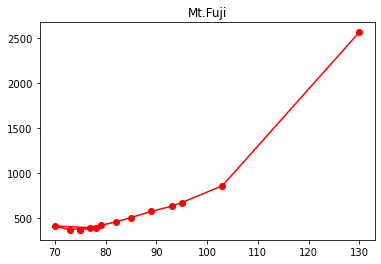

下山ルートのＸ座標:[100, 96, 90, 87, 84, 81, 77, 75, 75]


下山ルートのＹ座標:[772, 700.15, 588.99, 536.54, 488.4, 443.0, 386.64, 371.19, 371.19]


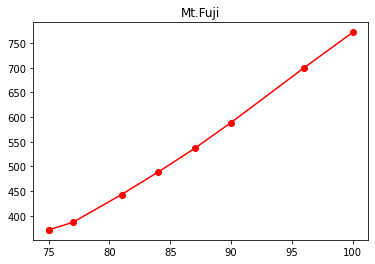

In [5]:
#----インポート----
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

#----ＣＳＶをインポート----
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1) # np.loadtxtはCSVをNumpyで利用する関数、delimiterは値と値を区切る文字が何であるかskiprows何行目から読み込み始めるか
destination_point_list = []

#----関数③作成----
def down_MtFuji_function(k):
            
    """
    最初の地点を受け取り、while文で繰り返し勾配による下山を繰り返しXの移動量が5以下となったところで下山したと判断する
    引数：最初の地点（k）
    入力：次に移動する地点（destination_point）
    入力が入る度にリストにdestination_pointを格納する
    destination_point_list = [k]　#下山していくX地点の履歴リスト
    destination_point_list.append(destination_point)　destination_point_functionで次の下山地点がreturnする度にリストに入れる
        
    出力：whileが終了した時のリストの最終値
    """
    #下山していくX地点の履歴リスト
    destination_point_list = [k]
    
    #Xの移動量が5以下になったらwhile終了
    
    while len(destination_point_list) < 1000: #len(fuji[:, 0]): #下山したポイントがX地点の数より少ない限り繰り返す
        
        #始めのＸ位置を今の移動地点をリストの最終要素（初回はｋの値）にする
        i = destination_point_list[-1]
        
        #↓その時iに何が入っているか確認できる
        #print("i は"+str(i))↓
        
        #if分でリストの中身が３個以上、かつ下山したX地点同士の差が0.5以下の場合下山完了完了としてbreak
        if len(destination_point_list) > 3 and abs(destination_point_list[-1] - destination_point_list[-2] ) < 0.5:
            break
        
        #----関数②作成----
        def destination_point_function(i ,α=0.2):
            """
            今いる地点の勾配の情報を元に、次に移動する地点を計算する関数

            移動先の地点を算出する式：「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」
            α：ハイパーパラメータ（今回は0.2をデフォルト）
            入力：ある地点（i）
            destination_point：移動先の地点
            出力：次に移動する地点
            """
                        
            #----関数①作成----
            def slope_Mt_Fuji(i):

                """
                ある地点の勾配を計算する関数

                入力：ある地点（i）
                amount_X：Xの変化量
                amount_Y：Yの変化量
                slope_fuji：勾配（amount_Y　/　amount_X　で求める
                出力：i地点の勾配（slope_fuji）
                """

                amount_X = fuji[int(i), 0] - fuji[int(i)-1, 0] #Xのi地点から（i-1）地点の差分（変化量）
                amount_Y = fuji[int(i), 3] - fuji[int(i)-1, 3] #Yのi地点から（i-1）地点の差分（変化量）
                slope_fuji = amount_Y / amount_X #勾配
                
                return slope_fuji
                #----関数①ここまで----
                
            slope_fuji = slope_Mt_Fuji(i) #直上の関数①（slope_Mt_Fujiを引数(i)で呼び出し）
            
            #移動先の地点(destination_point) = 今いる地点(fuji[i, 0]) - α ×今いる地点の勾配(slope_fuji)
            destination_point = fuji[int(i), 0] - α * slope_fuji
            
            #四捨五入するDecimalでXの誤差をカット
            destination_point_decimalcut = Decimal(destination_point).quantize(Decimal('0'), rounding=ROUND_HALF_UP) 
            
            return destination_point_decimalcut ,i #次に移動する地点(destination_point) と最初の地点をリターン
            #----関数②ここまで----
            
        #直上のdestination_point_functionを呼び出し、始まりの地点は下山リストの最終値（destination_point_list[-1]）    
        destination_point_decimalcut ,i= destination_point_function(i=destination_point_list[-1] ,α=0.2) 
        
        #関数②でリターンされた下山した移動地点（destination_point）をリストに格納
        destination_point_list.append(int(destination_point_decimalcut))
    
      
    return destination_point_list
    #----関数③ここまで----

#----①関数の呼び出し文K = 169の場合----  
K = 130
destination_point_list = down_MtFuji_function(K)

#----下山ルートのＸ座標を表示
print("下山ルートのＸ座標:"+str(destination_point_list))
print("\n")


#----下山ルートのY座標リスト（初期値にX=136を代入）
destination_point_list_elevation_list=[int(fuji[K, 3])]

#----下山ルートのＸ座標の回数だけY座標を出力する
for l in range(1,int(len(destination_point_list))):
    
    p = destination_point_list[l] #下山ルートのＸ座標のｌ番目
    
    destination_point_list_elevation_list.append(fuji[p,3]) #fuji[p,3]が下山ルートのＸ座標におけるY座標。これをリストに追加

#----下山ルートのY座標を表示
print("下山ルートのＹ座標:"+str(destination_point_list_elevation_list))

#----グラフを表示----

plt.title('Mt.Fuji') # グラフタイトル
#plt.plot(position, elevation, color = 'red', marker = 'o') #X軸にposition、Y軸にelevationを入力
plt.plot(destination_point_list, destination_point_list_elevation_list, color = 'red', marker = 'o')
plt.show() 


#----②関数の呼び出し文K = 100の場合----  
K = 100
destination_point_list = down_MtFuji_function(K)

#----下山ルートのＸ座標を表示
print("下山ルートのＸ座標:"+str(destination_point_list))
print("\n")


#----下山ルートのY座標リスト（初期値にX=136を代入）
destination_point_list_elevation_list=[int(fuji[K, 3])]

#----下山ルートのＸ座標の回数だけY座標を出力する
for l in range(1,int(len(destination_point_list))):
    
    p = destination_point_list[l] #下山ルートのＸ座標のｌ番目
    
    destination_point_list_elevation_list.append(fuji[p,3]) #fuji[p,3]が下山ルートのＸ座標におけるY座標。これをリストに追加

#----下山ルートのY座標を表示
print("下山ルートのＹ座標:"+str(destination_point_list_elevation_list))

#----グラフを表示----

plt.title('Mt.Fuji') # グラフタイトル
#plt.plot(position, elevation, color = 'red', marker = 'o') #X軸にposition、Y軸にelevationを入力
plt.plot(destination_point_list, destination_point_list_elevation_list, color = 'red', marker = 'o')
plt.show() 


【問題8】（アドバンス問題）ハイパーパラメータの変更

下山ルートのＸ座標:[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77]


下山ルートのＹ座標:[3434, 817.62, 741.17, 672.36, 631.71, 575.07, 505.1, 458.66, 418.41, 368.91, 412.27, 390.14, 386.64]


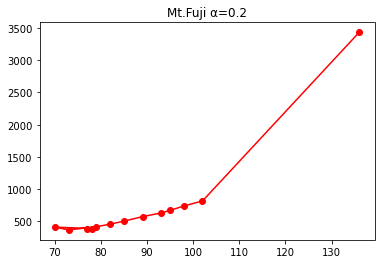

下山ルートのＸ座標:[136, 52, 15, 46, 46]


下山ルートのＹ座標:[3434, 955.14, 371.74, 724.5, 724.5]


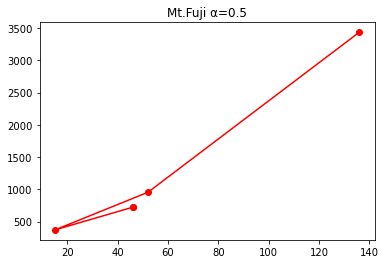

下山ルートのＸ座標:[136, 128, 122, 119, 116, 113, 110, 109]


下山ルートのＹ座標:[3434, 2306.85, 1726.5, 1561.94, 1360.1, 1219.86, 1059.69, 1034.34]


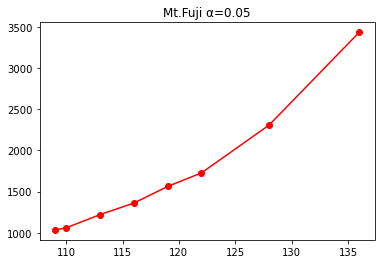

In [21]:
#----ハイパーパラメータをあと２種類試してみる　α = 0.5　α= 0.05

#----インポート----
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

#----ＣＳＶをインポート----
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1) # np.loadtxtはCSVをNumpyで利用する関数、delimiterは値と値を区切る文字が何であるかskiprows何行目から読み込み始めるか
destination_point_list = []

#----インポート----
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

#----ＣＳＶをインポート----
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1) # np.loadtxtはCSVをNumpyで利用する関数、delimiterは値と値を区切る文字が何であるかskiprows何行目から読み込み始めるか
destination_point_list = []



#------------α=0.2でトライ------------

#----関数③作成----
def down_MtFuji_function(k):
            
    """
    最初の地点を受け取り、while文で繰り返し勾配による下山を繰り返しXの移動量が5以下となったところで下山したと判断する
    引数：最初の地点（k）
    入力：次に移動する地点（destination_point）
    入力が入る度にリストにdestination_pointを格納する
    destination_point_list = [k]　#下山していくX地点の履歴リスト
    destination_point_list.append(destination_point)　destination_point_functionで次の下山地点がreturnする度にリストに入れる
        
    出力：whileが終了した時のリストの最終値
    """
    #下山していくX地点の履歴リスト
    destination_point_list = [k]
    
    #Xの移動量が5以下になったらwhile終了
    
    while len(destination_point_list) < len(fuji[:, 0]): #下山したポイントがX地点の数より少ない限り繰り返す
        
        #始めのＸ位置を今の移動地点をリストの最終要素（初回はｋの値）にする
        i = destination_point_list[-1]
        
        #↓その時iに何が入っているか確認できる
        #print("i は"+str(i))↓
        
        #if分でリストの中身が３個以上、かつ下山したX地点同士の差が1以下の場合下山完了完了としてbreak
        if len(destination_point_list) > 3 and abs(destination_point_list[-1] - destination_point_list[-2] ) <= 1:
            break
        
        #---☆★---関数②作成----
        def destination_point_function(i ,α=0.2):
            """
            今いる地点の勾配の情報を元に、次に移動する地点を計算する関数

            移動先の地点を算出する式：「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」
            α：ハイパーパラメータ（今回は0.2をデフォルト）
            入力：ある地点（i）
            destination_point：移動先の地点
            出力：次に移動する地点
            """
                        
            #----関数①作成----
            def slope_Mt_Fuji(i):

                """
                ある地点の勾配を計算する関数

                入力：ある地点（i）
                amount_X：Xの変化量
                amount_Y：Yの変化量
                slope_fuji：勾配（amount_Y　/　amount_X　で求める
                出力：i地点の勾配（slope_fuji）
                """

                amount_X = fuji[int(i), 0] - fuji[int(i)-1, 0] #Xのi地点から（i-1）地点の差分（変化量）
                amount_Y = fuji[int(i), 3] - fuji[int(i)-1, 3] #Yのi地点から（i-1）地点の差分（変化量）
                slope_fuji = amount_Y / amount_X #勾配
                
                return slope_fuji
                #----関数①ここまで----
                
            slope_fuji = slope_Mt_Fuji(i) #直上の関数①（slope_Mt_Fujiを引数(i)で呼び出し）
            
            #移動先の地点(destination_point) = 今いる地点(fuji[i, 0]) - α ×今いる地点の勾配(slope_fuji)
            destination_point = fuji[int(i), 0] - α * slope_fuji
            
            #四捨五入するDecimalでXの誤差をカット
            destination_point_decimalcut = Decimal(destination_point).quantize(Decimal('0'), rounding=ROUND_HALF_UP) 
            
            return destination_point_decimalcut ,i #次に移動する地点(destination_point) と最初の地点をリターン
            #----関数②ここまで----
            
        #---☆★---直上のdestination_point_functionを呼び出し、始まりの地点は下山リストの最終値（destination_point_list[-1]）    
        destination_point_decimalcut ,i= destination_point_function(i=destination_point_list[-1] ,α=0.2) 
        
        #関数②でリターンされた下山した移動地点（destination_point）をリストに格納
        destination_point_list.append(int(destination_point_decimalcut))
    
      
    return destination_point_list
    #----関数③ここまで----

    
    
#----関数の呼び出し文----  
K = 136
destination_point_list = down_MtFuji_function(K)

#----下山ルートのＸ座標を表示
print("下山ルートのＸ座標:"+str(destination_point_list))
print("\n")


#----下山ルートのY座標リスト（初期値にX=136を代入）
destination_point_list_elevation_list=[int(fuji[K, 3])]

#----下山ルートのＸ座標の回数だけY座標を出力する
for l in range(1,int(len(destination_point_list))):
    
    p = destination_point_list[l] #下山ルートのＸ座標のｌ番目
    
    destination_point_list_elevation_list.append(fuji[p,3]) #fuji[p,3]が下山ルートのＸ座標におけるY座標。これをリストに追加

#----下山ルートのY座標を表示
print("下山ルートのＹ座標:"+str(destination_point_list_elevation_list))

#----グラフを表示----

plt.title('Mt.Fuji α=0.2') # グラフタイトル
#plt.plot(position, elevation, color = 'red', marker = 'o') #X軸にposition、Y軸にelevationを入力
plt.plot(destination_point_list, destination_point_list_elevation_list, color = 'red', marker = 'o')
plt.show() 



#------------α=0.5でトライ------------

#----関数③作成----
def down_MtFuji_function(k):
            
    """
    最初の地点を受け取り、while文で繰り返し勾配による下山を繰り返しXの移動量が5以下となったところで下山したと判断する
    引数：最初の地点（k）
    入力：次に移動する地点（destination_point）
    入力が入る度にリストにdestination_pointを格納する
    destination_point_list = [k]　#下山していくX地点の履歴リスト
    destination_point_list.append(destination_point)　destination_point_functionで次の下山地点がreturnする度にリストに入れる
        
    出力：whileが終了した時のリストの最終値
    """
    #下山していくX地点の履歴リスト
    destination_point_list = [k]
    
    #Xの移動量が5以下になったらwhile終了
    
    while len(destination_point_list) < len(fuji[:, 0]): #下山したポイントがX地点の数より少ない限り繰り返す
        
        #始めのＸ位置を今の移動地点をリストの最終要素（初回はｋの値）にする
        i = destination_point_list[-1]
        
        #↓その時iに何が入っているか確認できる
        #print("i は"+str(i))↓
        
        #if分でリストの中身が３個以上、かつ下山したX地点同士の差が1以下の場合下山完了完了としてbreak
        if len(destination_point_list) > 3 and abs(destination_point_list[-1] - destination_point_list[-2] ) <= 1:
            break
        
        #---☆★---関数②作成----
        def destination_point_function(i ,α=0.5):
            """
            今いる地点の勾配の情報を元に、次に移動する地点を計算する関数

            移動先の地点を算出する式：「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」
            α：ハイパーパラメータ（今回は0.2をデフォルト）
            入力：ある地点（i）
            destination_point：移動先の地点
            出力：次に移動する地点
            """
                        
            #----関数①作成----
            def slope_Mt_Fuji(i):

                """
                ある地点の勾配を計算する関数

                入力：ある地点（i）
                amount_X：Xの変化量
                amount_Y：Yの変化量
                slope_fuji：勾配（amount_Y　/　amount_X　で求める
                出力：i地点の勾配（slope_fuji）
                """

                amount_X = fuji[int(i), 0] - fuji[int(i)-1, 0] #Xのi地点から（i-1）地点の差分（変化量）
                amount_Y = fuji[int(i), 3] - fuji[int(i)-1, 3] #Yのi地点から（i-1）地点の差分（変化量）
                slope_fuji = amount_Y / amount_X #勾配
                
                return slope_fuji
                #----関数①ここまで----
                
            slope_fuji = slope_Mt_Fuji(i) #直上の関数①（slope_Mt_Fujiを引数(i)で呼び出し）
            
            #移動先の地点(destination_point) = 今いる地点(fuji[i, 0]) - α ×今いる地点の勾配(slope_fuji)
            destination_point = fuji[int(i), 0] - α * slope_fuji
            
            #四捨五入するDecimalでXの誤差をカット
            destination_point_decimalcut = Decimal(destination_point).quantize(Decimal('0'), rounding=ROUND_HALF_UP) 
            
            return destination_point_decimalcut ,i #次に移動する地点(destination_point) と最初の地点をリターン
            #----関数②ここまで----
            
        #---☆★---直上のdestination_point_functionを呼び出し、始まりの地点は下山リストの最終値（destination_point_list[-1]）    
        destination_point_decimalcut ,i= destination_point_function(i=destination_point_list[-1] ,α=0.5) 
        
        #関数②でリターンされた下山した移動地点（destination_point）をリストに格納
        destination_point_list.append(int(destination_point_decimalcut))
    
      
    return destination_point_list
    #----関数③ここまで----

    
    
#----関数の呼び出し文----  
K = 136
destination_point_list = down_MtFuji_function(K)

#----下山ルートのＸ座標を表示
print("下山ルートのＸ座標:"+str(destination_point_list))
print("\n")


#----下山ルートのY座標リスト（初期値にX=136を代入）
destination_point_list_elevation_list=[int(fuji[K, 3])]

#----下山ルートのＸ座標の回数だけY座標を出力する
for l in range(1,int(len(destination_point_list))):
    
    p = destination_point_list[l] #下山ルートのＸ座標のｌ番目
    
    destination_point_list_elevation_list.append(fuji[p,3]) #fuji[p,3]が下山ルートのＸ座標におけるY座標。これをリストに追加

#----下山ルートのY座標を表示
print("下山ルートのＹ座標:"+str(destination_point_list_elevation_list))

#----グラフを表示----

plt.title('Mt.Fuji α=0.5') # グラフタイトル
#plt.plot(position, elevation, color = 'red', marker = 'o') #X軸にposition、Y軸にelevationを入力
plt.plot(destination_point_list, destination_point_list_elevation_list, color = 'red', marker = 'o')
plt.show() 


#------------α=0.05でトライ------------

#----関数③作成----
def down_MtFuji_function(k):
            
    """
    最初の地点を受け取り、while文で繰り返し勾配による下山を繰り返しXの移動量が5以下となったところで下山したと判断する
    引数：最初の地点（k）
    入力：次に移動する地点（destination_point）
    入力が入る度にリストにdestination_pointを格納する
    destination_point_list = [k]　#下山していくX地点の履歴リスト
    destination_point_list.append(destination_point)　destination_point_functionで次の下山地点がreturnする度にリストに入れる
        
    出力：whileが終了した時のリストの最終値
    """
    #下山していくX地点の履歴リスト
    destination_point_list = [k]
    
    #Xの移動量が5以下になったらwhile終了
    
    while len(destination_point_list) < len(fuji[:, 0]): #下山したポイントがX地点の数より少ない限り繰り返す
        
        #始めのＸ位置を今の移動地点をリストの最終要素（初回はｋの値）にする
        i = destination_point_list[-1]
        
        #↓その時iに何が入っているか確認できる
        #print("i は"+str(i))↓
        
        #if分でリストの中身が３個以上、かつ下山したX地点同士の差が1以下の場合下山完了完了としてbreak
        if len(destination_point_list) > 3 and abs(destination_point_list[-1] - destination_point_list[-2] ) <= 1:
            break
        
        #---☆★---関数②作成----
        def destination_point_function(i ,α=0.05):
            """
            今いる地点の勾配の情報を元に、次に移動する地点を計算する関数

            移動先の地点を算出する式：「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」
            α：ハイパーパラメータ（今回は0.2をデフォルト）
            入力：ある地点（i）
            destination_point：移動先の地点
            出力：次に移動する地点
            """
                        
            #----関数①作成----
            def slope_Mt_Fuji(i):

                """
                ある地点の勾配を計算する関数

                入力：ある地点（i）
                amount_X：Xの変化量
                amount_Y：Yの変化量
                slope_fuji：勾配（amount_Y　/　amount_X　で求める
                出力：i地点の勾配（slope_fuji）
                """

                amount_X = fuji[int(i), 0] - fuji[int(i)-1, 0] #Xのi地点から（i-1）地点の差分（変化量）
                amount_Y = fuji[int(i), 3] - fuji[int(i)-1, 3] #Yのi地点から（i-1）地点の差分（変化量）
                slope_fuji = amount_Y / amount_X #勾配
                
                return slope_fuji
                #----関数①ここまで----
                
            slope_fuji = slope_Mt_Fuji(i) #直上の関数①（slope_Mt_Fujiを引数(i)で呼び出し）
            
            #移動先の地点(destination_point) = 今いる地点(fuji[i, 0]) - α ×今いる地点の勾配(slope_fuji)
            destination_point = fuji[int(i), 0] - α * slope_fuji
            
            #四捨五入するDecimalでXの誤差をカット
            destination_point_decimalcut = Decimal(destination_point).quantize(Decimal('0'), rounding=ROUND_HALF_UP) 
            
            return destination_point_decimalcut ,i #次に移動する地点(destination_point) と最初の地点をリターン
            #----関数②ここまで----
            
        #---☆★---直上のdestination_point_functionを呼び出し、始まりの地点は下山リストの最終値（destination_point_list[-1]）    
        destination_point_decimalcut ,i= destination_point_function(i=destination_point_list[-1] ,α=0.05) 
        
        #関数②でリターンされた下山した移動地点（destination_point）をリストに格納
        destination_point_list.append(int(destination_point_decimalcut))
    
      
    return destination_point_list
    #----関数③ここまで----

    
    
#----関数の呼び出し文----  
K = 136
destination_point_list = down_MtFuji_function(K)

#----下山ルートのＸ座標を表示
print("下山ルートのＸ座標:"+str(destination_point_list))
print("\n")


#----下山ルートのY座標リスト（初期値にX=136を代入）
destination_point_list_elevation_list=[int(fuji[K, 3])]

#----下山ルートのＸ座標の回数だけY座標を出力する
for l in range(1,int(len(destination_point_list))):
    
    p = destination_point_list[l] #下山ルートのＸ座標のｌ番目
    
    destination_point_list_elevation_list.append(fuji[p,3]) #fuji[p,3]が下山ルートのＸ座標におけるY座標。これをリストに追加

#----下山ルートのY座標を表示
print("下山ルートのＹ座標:"+str(destination_point_list_elevation_list))

#----グラフを表示----

plt.title('Mt.Fuji α=0.05') # グラフタイトル
#plt.plot(position, elevation, color = 'red', marker = 'o') #X軸にposition、Y軸にelevationを入力
plt.plot(destination_point_list, destination_point_list_elevation_list, color = 'red', marker = 'o')
plt.show() 

